In [183]:
%matplotlib inline
import mysql.connector as mysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [184]:
cnx = mysql.connect(user='root', password='galletas',
                              host='127.0.0.1',
                              database='iqblade')

In [185]:
cursor = cnx.cursor(named_tuple=True)

In [186]:
query = (
"Select * "
"from data_financials_2015"
)

In [187]:
cursor.execute(query,10)
data = cursor.fetchall()
cnx.close()

In [188]:
d = pd.DataFrame(data)
d.head().T

,0,1,2,3,4
primary_type_id,ISV,ISV,ISV,ISV,ISV
financial_year,2015,2015,2015,2015,2015
turnover,1.725e+07,NaN,NaN,9.76106e+07,8.16834e+06
export,1.917e+06,NaN,NaN,2.1606e+06,NaN
cost_of_sales,3.446e+06,NaN,NaN,NaN,740142
gross_profit,1.3804e+07,NaN,NaN,NaN,7.4282e+06
wages_and_salaries,9.721e+06,NaN,NaN,3.99344e+07,6.57134e+06
director_emoluments,NaN,NaN,NaN,1.15573e+06,431243
operating_profit,530000,NaN,NaN,2.72383e+07,NaN
depreciation,139000,27849,NaN,6.74082e+06,55669


What to do with the values that have **`Nan`** and **`None`**? What types are the columns?  
Apparently the `None` values is a pandas dataframe value for null values in object type columns. `Nan` values might be the same but for numeric only. 

In [189]:
# This column has None values
d.difference.isnull().sum()

2060

In [190]:
# This column has NaN
d.turnover.isnull().mean()

0.65000000000000002

In [191]:
y = d.primary_type_id
d.drop('primary_type_id', axis = 1, inplace= True)

In [192]:
d.set_index(d.organisation_id, inplace= True)
d.drop('organisation_id', axis = 1, inplace= True)
d.drop('financial_year', axis = 1, inplace= True)

In [193]:
d.head()

,turnover,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
organisation_id,,,,,,,,,,,,,,,,,,,,,
186,17250000.0,1917000.0,3446000.0,13804000.0,9721000.0,NaN,530000.0,139000.0,35000.0,108000.0,...,96.16,51449.0,3.07,8965.0,80.02,13.41,17.43,None,NaN,None
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27849.0,NaN,NaN,...,None,NaN,None,NaN,None,None,None,None,NaN,None
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,None,None,None,None,NaN,None
364,97610634.0,2160595.0,NaN,NaN,39934432.0,1155734.0,27238314.0,6740819.0,30000.0,184024.0,...,None,NaN,27.91,16987.0,None,19.98,None,None,NaN,None
365,8168344.0,NaN,740142.0,7428202.0,6571335.0,431243.0,NaN,55669.0,13829.0,NaN,...,None,NaN,-12.24,NaN,90.94,-9.95,None,None,NaN,None


In [194]:
# Recast as numeric values
d[d.columns[d.dtypes == 'object']] = d.select_dtypes(include=['object']).apply(pd.to_numeric)

In [195]:
d.head()

,turnover,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
organisation_id,,,,,,,,,,,,,,,,,,,,,
186,17250000.0,1917000.0,3446000.0,13804000.0,9721000.0,NaN,530000.0,139000.0,35000.0,108000.0,...,96.16,51449.0,3.07,8965.0,80.02,13.41,17.43,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27849.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,97610634.0,2160595.0,NaN,NaN,39934432.0,1155734.0,27238314.0,6740819.0,30000.0,184024.0,...,NaN,NaN,27.91,16987.0,NaN,19.98,NaN,NaN,NaN,NaN
365,8168344.0,NaN,740142.0,7428202.0,6571335.0,431243.0,NaN,55669.0,13829.0,NaN,...,NaN,NaN,-12.24,NaN,90.94,-9.95,NaN,NaN,NaN,NaN


In [196]:
# Look for the most complete columns (no NaN's)
d[d.columns[(d.describe().iloc[0]/len(y) == 1.0)]].describe()

,pre_tax_profit_margin,current_ratio,gearing,sales_networking_capital,equity_in_percent,creditor_days,debtor_days,liquidity_acid_test,return_on_capital_employed,return_on_total_assets_employed,current_debt_ratio,total_debt_ratio,stock_turnover_ratio,return_on_net_assets_employed
count,2060.000000,2060.000000,2060.000000,2060.0,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000
mean,-6.696893,27.728796,117.422670,0.0,11.650704,11.650704,22.333340,27.680015,1.947456,-1.024102,10.253053,11.323345,0.545160,-2.508490
std,117.927843,1086.054359,2437.267853,0.0,42.894063,42.894063,49.243621,1086.055466,733.108870,31.093204,113.093259,118.346151,8.185934,699.146498
min,-4022.860000,0.000000,-8981.000000,0.0,0.000000,0.000000,0.000000,0.000000,-29917.280000,-430.220000,-205.910000,-212.690000,0.000000,-29917.280000
25%,0.000000,0.930000,0.000000,0.0,0.000000,0.000000,0.000000,0.860000,0.000000,0.000000,0.120000,0.160000,0.000000,0.000000
50%,0.000000,1.310000,0.000000,0.0,0.000000,0.000000,0.000000,1.270000,0.000000,0.000000,0.830000,0.980000,0.000000,0.000000
75%,0.000000,2.110000,9.700000,0.0,8.585000,8.585000,35.127500,2.062500,4.637500,0.000000,2.560000,2.805000,0.000000,7.762500
max,932.590000,49272.000000,91077.200000,0.0,1365.670000,1365.670000,1054.450000,49272.000000,10475.930000,338.960000,2887.200000,2887.200000,355.290000,6782.800000


In [197]:
print "Columns with no missing values:  ", len(d.columns[(d.describe().iloc[0]/len(y) == 1.0)])
print "Columns more than 80% complete:\t ", len(d.columns[(d.describe().iloc[0]/len(y) >= .8)])

print "\n", d.columns[np.logical_and(.8 <= (np.array(d.describe().iloc[0]/len(y))),(np.array(d.describe().iloc[0]/len(y))) < 1.)]

Columns with no missing values:   14
Columns more than 80% complete:	  28

Index([u'depreciation', u'tangible_assets', u'total_fixed_assets',
       u'trade_debtors', u'cash', u'total_current_assets', u'trade_creditors',
       u'total_current_liabilities', u'called_up_share_capital',
       u'shareholder_funds', u'total_assets', u'total_liabilities',
       u'net_assets', u'capital_employed'],
      dtype='object')


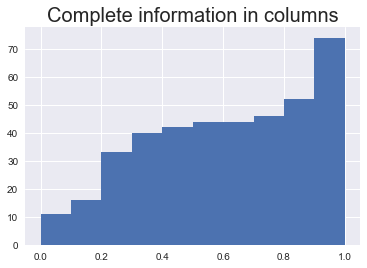

In [198]:
plt.hist(d.describe().iloc[0]/len(y), cumulative = True, density = False, histtype = 'stepfilled');
plt.title('Complete information in columns', fontsize = 20);

In [199]:
df = d
df['type'] = pd.DataFrame(y).set_index(df.index)
weights = np.array(df.drop('type', axis =1).isnull().groupby(df.type).count())
df = df.drop('type', axis =1).isnull().groupby(df.type).mean()

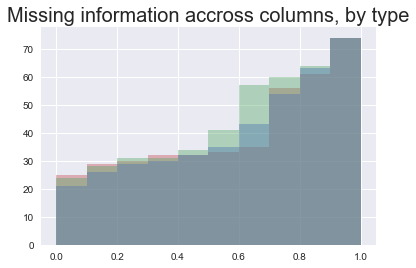

In [200]:
plt.hist(np.array(df).T, cumulative = True, density = False, histtype='stepfilled', alpha = .4);
plt.title("Missing information accross columns, by type", fontsize = 20);
# Note: There is an overlap, so it does not make sense to just stack the histograms

In [201]:
df

,turnover,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
type,,,,,,,,,,,,,,,,,,,,,
ISV,0.627574,0.880931,0.708147,0.700090,0.675918,0.744852,0.782453,0.187108,0.666965,0.790510,...,0.820949,0.843330,0.630260,0.799463,0.688451,0.606088,0.820949,1.0,1.000000,1.0
MSP,0.509804,0.911765,0.544118,0.544118,0.612745,0.622549,0.651961,0.107843,0.637255,0.612745,...,0.661765,0.725490,0.514706,0.730392,0.519608,0.500000,0.661765,1.0,0.965686,1.0
Reseller,0.722598,0.907984,0.734777,0.733424,0.769959,0.776725,0.763194,0.127199,0.767253,0.803789,...,0.771313,0.813261,0.722598,0.801083,0.730717,0.718539,0.771313,1.0,0.967524,1.0


count    1.990000e+03
mean     1.738939e+07
std      1.269593e+08
min      1.000000e+00
25%      2.617790e+05
50%      1.095744e+06
75%      4.182539e+06
max      3.341237e+09
Name: total_assets, dtype: float64


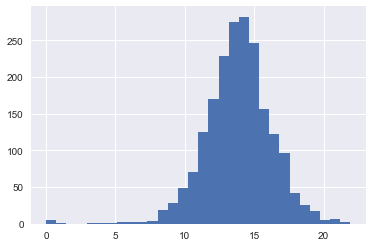

In [202]:
np.array([d[u'tangible_assets'].isnull(), d[u'intangible_assets'].isnull(), d[u'total_assets'].isnull()]).mean(axis = 1)
# Conclusion: work with total assets
print d[u'total_assets'].describe()
plt.hist(np.log(d[u'total_assets'][d[u'total_assets'].notnull()]), 30);

count     2060.000000
mean        27.680015
std       1086.055466
min          0.000000
25%          0.860000
50%          1.270000
75%          2.062500
max      49272.000000
Name: liquidity_acid_test, dtype: float64

Zeros:  0.0519417475728


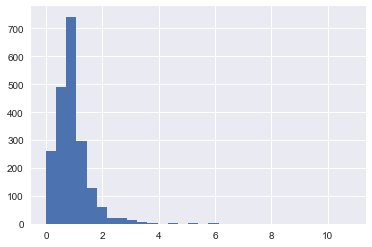

In [203]:
d[u'liquidity_acid_test'].isnull().mean()
# Conclusion: work with liquidity test
print d[u'liquidity_acid_test'].describe()
print "\nZeros: ", np.mean(d[u'liquidity_acid_test']==0)
plt.hist(np.log(d[u'liquidity_acid_test']+1), 30);

count    2060.000000
mean       11.323345
std       118.346151
min      -212.690000
25%         0.160000
50%         0.980000
75%         2.805000
max      2887.200000
Name: total_debt_ratio, dtype: float64

Negatives:  0.166990291262
Zeros:  0.0456310679612


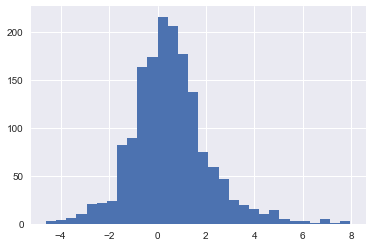

In [204]:
# Conclusion: work with debt ratio
print d[u'total_debt_ratio'].describe()
print "\nNegatives: ", np.mean(d[u'total_debt_ratio'] < 0)
print "Zeros: ", np.mean(d[u'total_debt_ratio'] == 0)

plt.hist(np.log(d[u'total_debt_ratio'][d[u'total_debt_ratio']>0]), 30);

count    1.649000e+03
mean     8.292499e+06
std      5.399513e+07
min      1.000000e+00
25%      1.058130e+05
50%      4.544100e+05
75%      1.760258e+06
max      1.100500e+09
Name: shareholder_funds, dtype: float64
Nulls:  0.199514563107


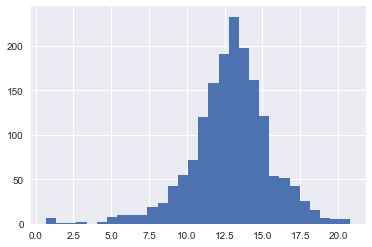

In [205]:
print d[u'shareholder_funds'].describe()
print "Nulls: ",d[u'shareholder_funds'].isnull().mean()

plt.hist(np.log(d[u'shareholder_funds'][d[u'shareholder_funds'].notnull()]+1), 30);

count    1.747000e+03
mean     1.163389e+07
std      8.941281e+07
min      1.000000e+00
25%      1.160350e+05
50%      5.364740e+05
75%      2.032410e+06
max      2.580687e+09
Name: capital_employed, dtype: float64


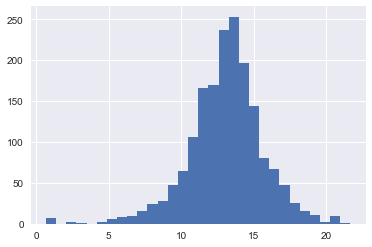

In [206]:
print d[u'capital_employed'].describe()
plt.hist(np.log(d[u'capital_employed'][d[u'capital_employed'].notnull()]+1), 30);

count    1.854000e+03
mean     2.166761e+06
std      8.916164e+06
min      1.000000e+00
25%      8.880950e+04
50%      3.504795e+05
75%      1.232716e+06
max      1.518397e+08
Name: trade_debtors, dtype: float64

Nulls:  0.1


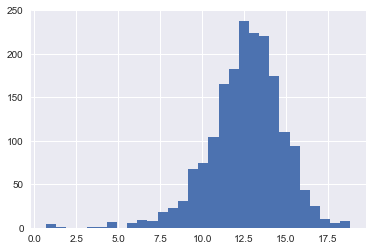

In [207]:
var = u'trade_debtors'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

count    1.923000e+03
mean     1.304622e+06
std      6.082992e+06
min      2.000000e+00
25%      6.943650e+04
50%      2.348170e+05
75%      7.755740e+05
max      1.590520e+08
Name: trade_creditors, dtype: float64

Nulls:  0.0665048543689


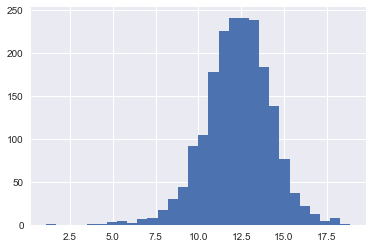

In [208]:
var = u'trade_creditors'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

count    1.747000e+03
mean     1.163389e+07
std      8.941281e+07
min      1.000000e+00
25%      1.160350e+05
50%      5.364740e+05
75%      2.032410e+06
max      2.580687e+09
Name: capital_employed, dtype: float64

Nulls:  0.151941747573


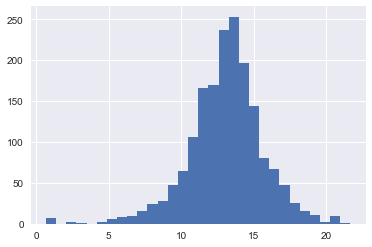

In [209]:
var = u'capital_employed'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

In [210]:
d[u'number_of_employees'].isnull().mean()
d[u'operating_costs_per_employee'].isnull().mean()
d[u'operating_costs'].isnull().mean()
d[u'gross_profit'].isnull().mean()
d[u'operating_profit'].isnull().mean()

0.76262135922330099

In [211]:
var = [u'total_assets',u'liquidity_acid_test',u'total_debt_ratio',u'shareholder_funds',u'capital_employed',u'trade_debtors',u'trade_creditors']
print "Incomplete cases: ", d[var].isnull().any(axis=1).mean()
print "Incomplete cells: ", np.isnan(np.array(d[var])).mean()

Incomplete cases:  0.259223300971
Incomplete cells:  0.0788488210818


In [212]:
var = [u'total_assets',u'shareholder_funds',u'liquidity_acid_test',u'total_debt_ratio',u'capital_employed',u'trade_debtors',u'trade_creditors']
print "Incomplete cases: ", d[var].isnull().any(axis=1).mean()
print "Incomplete cells: ", np.isnan(np.array(d[var])).mean()
df = d
df['type'] = pd.DataFrame(y).set_index(df.index)
df = df.drop('type', axis =1)[var].isnull().groupby(df.type).describe().T
df

Incomplete cases:  0.259223300971
Incomplete cells:  0.0788488210818


type                          ISV    MSP Reseller
total_assets        count    1117    204      739
                    unique      2      2        2
                    top     False  False    False
                    freq     1077    198      715
shareholder_funds   count    1117    204      739
                    unique      2      2        2
                    top     False  False    False
                    freq      835    166      648
liquidity_acid_test count    1117    204      739
                    unique      1      1        1
                    top     False  False    False
                    freq     1117    204      739
total_debt_ratio    count    1117    204      739
                    unique      1      1        1
                    top     False  False    False
                    freq     1117    204      739
capital_employed    count    1117    204      739
                    unique      2      2        2
                    top     False  False    False
                    freq      898    180      669
trade_debtors       count    1117    204      739
                    unique      2      2        2
                    top     False  False    False
                    freq      967    187      700
trade_creditors     count    1117    204      739
                    unique      2      2        2
                    top     False  False    False
                    freq     1025    193      705

In [213]:
df = d
df['type'] = pd.DataFrame(y).set_index(df.index)
df = df.drop('type', axis =1)[var].groupby(df.type).describe().T
df

type                                ISV           MSP      Reseller
total_assets        count  1.077000e+03  1.980000e+02  7.150000e+02
                    mean   1.940300e+07  4.939599e+07  5.492928e+06
                    std    1.477134e+08  2.000421e+08  2.339637e+07
                    min    1.000000e+00  3.368000e+03  1.000000e+00
                    25%    2.746270e+05  5.180032e+05  2.167665e+05
                    50%    1.213118e+06  2.090322e+06  7.967170e+05
                    75%    5.268614e+06  1.355643e+07  2.565492e+06
                    max    3.341237e+09  2.046618e+09  3.602430e+08
shareholder_funds   count  8.350000e+02  1.660000e+02  6.480000e+02
                    mean   1.090303e+07  1.951439e+07  2.053870e+06
                    std    6.603097e+07  8.044571e+07  8.682231e+06
                    min    1.000000e+00  1.004000e+03  1.000000e+00
                    25%    1.481470e+05  1.524770e+05  7.560825e+04
                    50%    6.455250e+05  5.768325e+05  3.023950e+05
                    75%    2.589814e+06  4.004570e+06  8.647652e+05
                    max    1.100500e+09  8.264540e+08  9.581600e+07
liquidity_acid_test count  1.117000e+03  2.040000e+02  7.390000e+02
                    mean   4.969314e+01  1.361765e+00  1.672246e+00
                    std    1.474830e+03  1.796580e+00  2.303420e+00
                    min    0.000000e+00  0.000000e+00  0.000000e+00
                    25%    8.200000e-01  7.000000e-01  9.500000e-01
                    50%    1.370000e+00  1.070000e+00  1.230000e+00
                    75%    2.470000e+00  1.435000e+00  1.795000e+00
                    max    4.927200e+04  2.292000e+01  4.500000e+01
total_debt_ratio    count  1.117000e+03  2.040000e+02  7.390000e+02
                    mean   8.607422e+00  1.709314e+00  1.808241e+01
                    std    1.079553e+02  2.198298e+01  1.457285e+02
                    min   -2.126900e+02 -1.522800e+02 -1.036900e+02
                    25%    0.000000e+00  4.375000e-01  6.100000e-01
                    50%    5.800000e-01  1.440000e+00  1.690000e+00
                    75%    1.850000e+00  3.712500e+00  4.070000e+00
                    max    2.887200e+03  1.312600e+02  2.570250e+03
capital_employed    count  8.980000e+02  1.800000e+02  6.690000e+02
                    mean   1.486152e+07  3.038332e+07  2.256740e+06
                    std    1.123162e+08  1.171647e+08  9.023049e+06
                    min    1.000000e+00  1.222000e+03  1.000000e+00
                    25%    1.621532e+05  1.946862e+05  8.005900e+04
                    50%    7.411690e+05  8.134435e+05  3.228630e+05
                    75%    2.980712e+06  5.622190e+06  1.024680e+06
                    max    2.580687e+09  9.845612e+08  9.624400e+07
trade_debtors       count  9.670000e+02  1.870000e+02  7.000000e+02
                    mean   2.126798e+06  2.749624e+06  2.066259e+06
                    std    9.290236e+06  6.718625e+06  8.908019e+06
                    min    1.000000e+00  1.696000e+03  2.000000e+00
                    25%    8.130450e+04  1.461845e+05  8.685525e+04
                    50%    3.425230e+05  4.769180e+05  3.301580e+05
                    75%    1.216546e+06  1.977463e+06  1.167858e+06
                    max    1.518397e+08  5.983800e+07  1.241050e+08
trade_creditors     count  1.025000e+03  1.930000e+02  7.050000e+02
                    mean   9.388321e+05  1.982353e+06  1.650909e+06
                    std    4.096456e+06  4.271808e+06  8.437744e+06
                    min    2.000000e+00  1.280000e+02  8.500000e+01
                    25%    5.100000e+04  1.517520e+05  9.014900e+04
                    50%    1.713450e+05  4.792140e+05  2.906400e+05
                    75%    5.970340e+05  1.615134e+06  9.179200e+05
                    max    6.215630e+07  3.429200e+07  1.590520e+08

In [214]:
df = d
df['type'] = pd.DataFrame(y).set_index(df.index)
df = df.drop('type', axis =1)[var].groupby(df.type)

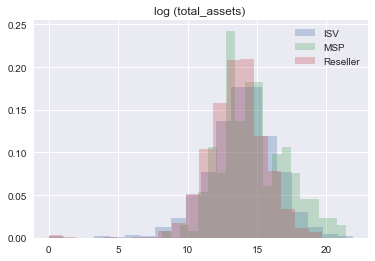

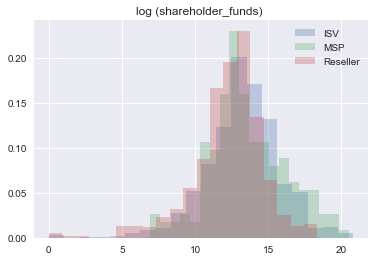

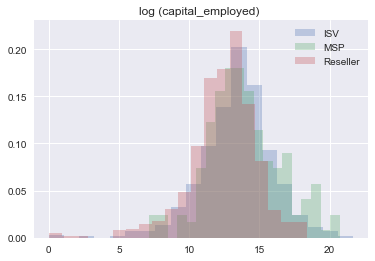

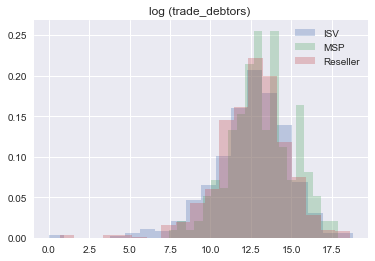

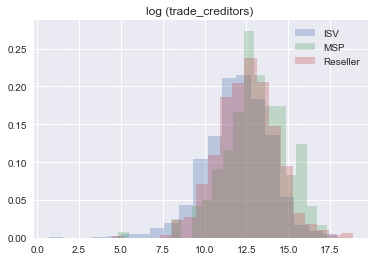

In [215]:
var = [u'total_assets',u'shareholder_funds',u'capital_employed',u'trade_debtors',u'trade_creditors']
for v in var:
    for index, group in df:
        plt.hist(np.log(group[v][group[v].notnull()]), 20, label = index, alpha = .3, density = True)
    plt.title("log (%s) "%(v))
    plt.legend()
    plt.show()

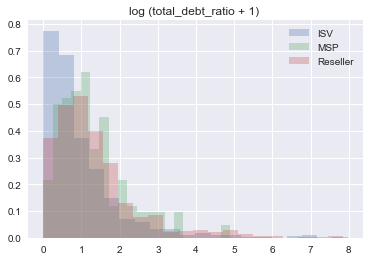

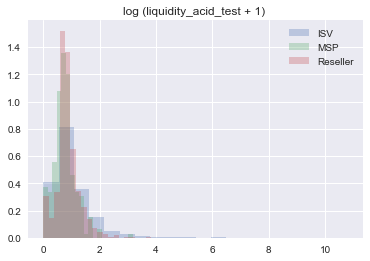

In [216]:
var = [u'total_debt_ratio',u'liquidity_acid_test']
for v in var:
    for index, group in df:
        plt.hist(np.log(group[v][group[v].notnull()][group[v]>=0]+1), 20, label = index, alpha = .3, density = True)
    plt.title("log (%s + 1) "%(v))
    plt.legend()
    plt.show()

In [217]:
var1 = [u'total_assets',u'shareholder_funds',u'capital_employed',u'trade_debtors',u'trade_creditors']
var2 = [u'total_debt_ratio',u'liquidity_acid_test']
dt = d
dt['type'] = pd.DataFrame(y).set_index(dt.index)
dt = dt[dt[list(np.append(var1,var2))].notnull().all(axis=1)][list(np.append(np.append(var1, var2),[u'type']))]

In [218]:
dt.head()

,total_assets,shareholder_funds,capital_employed,trade_debtors,trade_creditors,total_debt_ratio,liquidity_acid_test,type
organisation_id,,,,,,,,
186,52429000.0,39283000.0,39283000.0,1809000.0,124000.0,0.33,3.58,ISV
360,799220.0,407528.0,419176.0,268599.0,80713.0,0.96,1.75,ISV
364,88550457.0,50094014.0,51757984.0,6281971.0,3072662.0,0.76,1.32,ISV
367,1530421.0,946037.0,946037.0,330154.0,16387.0,0.61,1.32,ISV
368,1096319.0,515097.0,515097.0,74179.0,8045.0,1.12,1.87,ISV


In [219]:
dt[var1] = np.log(dt[var1])
dt[var2] = np.log(dt[var2]+1)
dt.head()

,total_assets,shareholder_funds,capital_employed,trade_debtors,trade_creditors,total_debt_ratio,liquidity_acid_test,type
organisation_id,,,,,,,,
186,17.774970,17.486302,17.486302,14.408285,11.728037,0.285179,1.521699,ISV
360,13.591392,12.917865,12.946046,12.500975,11.298655,0.672944,1.011601,ISV
364,18.299083,17.729412,17.762089,15.653194,14.938055,0.565314,0.841567,ISV
367,14.241053,13.760037,13.760037,12.707314,9.704244,0.476234,0.841567,ISV
368,13.907469,13.152111,13.152111,11.214236,8.992806,0.751416,1.054312,ISV


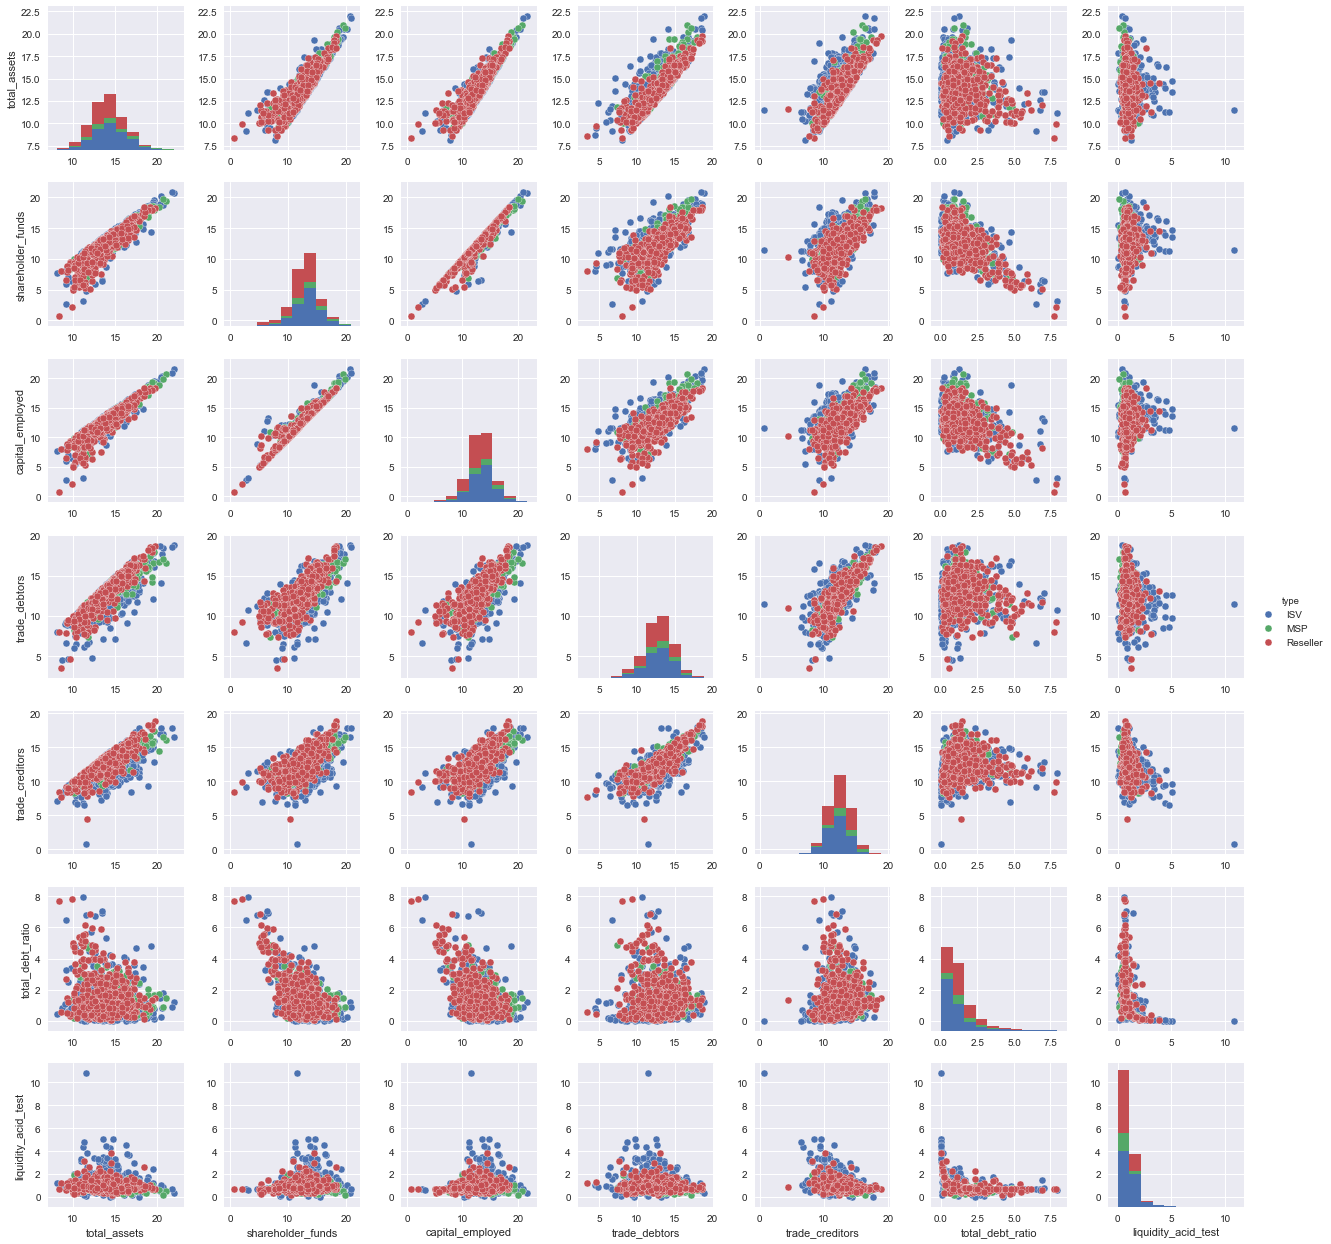

In [220]:
sns.pairplot(dt, hue = "type", );

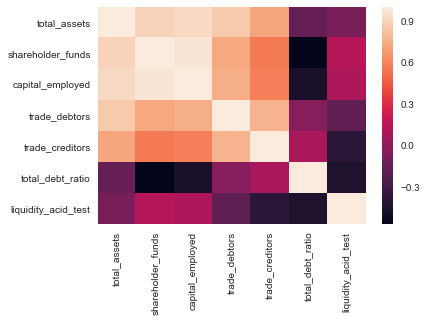

In [221]:
sns.heatmap(dt.corr());

In [222]:
dt.corr()

,total_assets,shareholder_funds,capital_employed,trade_debtors,trade_creditors,total_debt_ratio,liquidity_acid_test
total_assets,1.000000,0.899115,0.923997,0.860543,0.718103,-0.154333,-0.086657
shareholder_funds,0.899115,1.000000,0.972163,0.732891,0.558982,-0.571231,0.124326
capital_employed,0.923997,0.972163,1.000000,0.753189,0.579192,-0.461757,0.100143
trade_debtors,0.860543,0.732891,0.753189,1.000000,0.766914,-0.040523,-0.182072
trade_creditors,0.718103,0.558982,0.579192,0.766914,1.000000,0.084975,-0.393583
total_debt_ratio,-0.154333,-0.571231,-0.461757,-0.040523,0.084975,1.000000,-0.443463
liquidity_acid_test,-0.086657,0.124326,0.100143,-0.182072,-0.393583,-0.443463,1.000000


In [223]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
X = dt[np.append(var1,var2)]
y = dt['type']

In [224]:
pca = PCA(n_components=3)
pca.fit(normalize(X))
print pca.explained_variance_ratio_.cumsum()
Xnew = pca.transform(X)

[ 0.69068466  0.81803361  0.92005412]


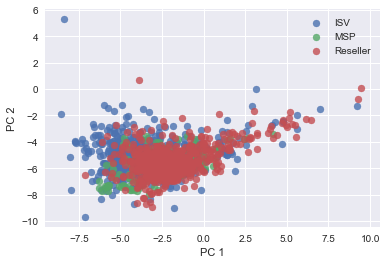

In [225]:
dnew = pd.DataFrame(Xnew, index = dt.index)
dnew['type'] = y
for index, data in dnew.groupby('type'):
    plt.scatter(data[0], data[1], label = index, alpha = .8)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()

In [226]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import MultiLabelBinarizer

In [227]:
mb = MultiLabelBinarizer()
classes = {u'ISV':'a', u'MSP':'b', u'Reseller':'c'}
y = y.map(classes)
mb.fit(y)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), mb.transform(y), test_size=0.2, random_state=0, shuffle = True, stratify = y)

In [259]:
print 1.*y_train.sum(axis = 0)/y_train.sum()
print 1.*y_test.sum(axis = 0)/y_test.sum()
print 1.*mb.transform(y).sum(axis = 0)/mb.transform(y).sum()

[ 0.48032787  0.10327869  0.41639344]
[ 0.48039216  0.10457516  0.41503268]
[ 0.48034076  0.10353866  0.41612058]
